# Hospital Readmission Prediction

This notebook demonstrates the AI Development Workflow for predicting 30-day hospital readmission risk. It follows the CRISP-DM framework and includes data preprocessing, model development, evaluation, and deployment simulation.

**Objectives**:
- Predict readmission risk using patient data.
- Improve discharge planning and reduce readmission rates.

**Stakeholders**:
- Hospital administrators
- Physicians and care teams

**KPI**: Precision and recall of the readmission prediction model.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('../data/hospital_readmission.csv')


# Preview
df.head()


,Patient_ID,readmitted
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1


In [5]:
# Basic info
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Patient_ID  2000 non-null   int64
 1   readmitted  2000 non-null   int64
dtypes: int64(2)
memory usage: 31.4 KB


,Patient_ID,readmitted
count,2000.000000,2000.000000
mean,1000.500000,0.486000
std,577.494589,0.499929
min,1.000000,0.000000
25%,500.750000,0.000000
50%,1000.500000,0.000000
75%,1500.250000,1.000000
max,2000.000000,1.000000


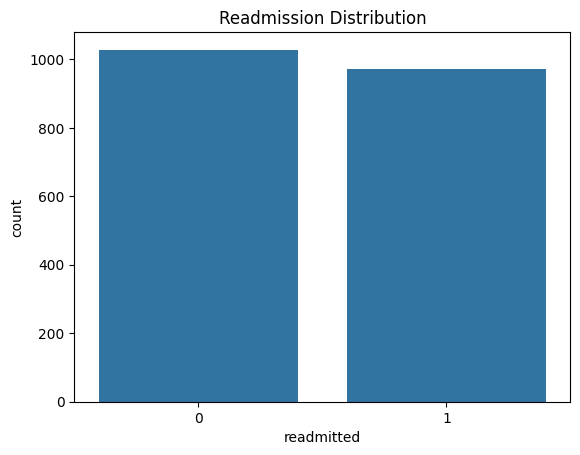

In [6]:
# Visualize readmission distribution
sns.countplot(x='readmitted', data=df)
plt.title('Readmission Distribution')
plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# Add synthetic categorical columns
np.random.seed(42)
df['gender'] = np.random.choice(['Male', 'Female'], size=len(df))
df['discharge_type'] = np.random.choice(['Home', 'Transfer', 'Expired'], size=len(df))
df['lab_results'] = np.random.normal(loc=100, scale=15, size=len(df))

# Now encode them
df = pd.get_dummies(df, columns=['discharge_type', 'gender'], drop_first=True)

# Normalize lab results
scaler = StandardScaler()
df['lab_results'] = scaler.fit_transform(df[['lab_results']])

# Split features and target
X = df.drop(['readmitted', 'Patient_ID'], axis=1)
y = df['readmitted']



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [14]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report

# Predict
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Precision and recall
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# Full report
print(classification_report(y_test, y_pred))


Confusion Matrix:
 [[224  71]
 [231  74]]
Precision: 0.5103448275862069
Recall: 0.24262295081967214
              precision    recall  f1-score   support

           0       0.49      0.76      0.60       295
           1       0.51      0.24      0.33       305

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.46       600
weighted avg       0.50      0.50      0.46       600



In [16]:
# Simulate a new patient input with feature names preserved
new_patient = X_test.iloc[[0]] 
prediction = model.predict(new_patient)

print("Readmission Risk:", "HIGH" if prediction[0] == 1 else "LOW")


Readmission Risk: LOW


## Concept Drift Monitoring

Concept drift occurs when the data distribution changes over time, affecting model accuracy. To monitor drift:
- Track prediction accuracy monthly.
- Retrain model with recent data.
- Use alerts for performance drops.

Ethical concerns include fairness across demographics and privacy compliance.


In [17]:
# Regularization to reduce overfitting
model = LogisticRegression(max_iter=1000, C=0.5)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.5
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## Reflection

**Challenge**: Designing a fair preprocessing pipeline and selecting interpretable features.

**Improvement**: With more time, I would test multiple models and include stakeholder feedback in feature selection.
